# BxB Digital Project

Author: Shubham Singh Yadav

Documentation regarding the approach, analysis and findings for this project is provided in a seperate file attached in the same repository on GitHub. 

Link to the Github Repo: 

### Importing Libraries

In [ ]:
#For working with data:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#For Scikit Learn:
import sklearn
import statsmodels.api as sm
from sklearn import linear_model

### Importing the Training Data

In [ ]:
#Change this variable's string to your path where the data is stored 
bxb_train_file_location = r"C:\Users\Bada Rock\Downloads\Train_data.csv"

#Creating Dataframe for the train dataset(pallets_df)
pallets_df = pd.read_csv(bxb_train_file_location)

#To check the total number of samples while getting an idea about the structure of data
print(pallets_df.tail())

In [ ]:
#Checking if any value of the DataFrame is NaN:
pallets_df.isnull().sum()

### Feature Engineering 1

***Why?***: 

This is done to further allow the conversion of this Time Series problem into a Supervised Learning Problem

***What?***: 

Breaking down the 'Month' column which contains string data as: 'mm/dd/yyyy' 
into two columns - 'Month_number' and 'Year', which just specifically contains the value of the
Month and Year. 

***Dropping***: 

Dates as they are of no use in monthwise prediction

In [ ]:
#FIRST, WORKING ON THE TRAINING DATASET FIRST(pallets_df):
#Breaking down Month's 'mm/dd/yyyy' into 3 columns:
broken_down_df = (pallets_df['Month'].str.split('/', expand=True))
broken_down_df.columns = ['Month_number', 'Date', 'Year']
#Deleting the 'Date' column from this as we no longer need it: 
del broken_down_df['Date']

#Concatenating this with the original 'pallets_df' dataframe and replacing the original: 
pallets_df = pd.concat((broken_down_df, pallets_df), axis=1)
#Deleting the original 'Month' column as we no long need it
del pallets_df['Month']

#Final result after the transformations:
print(pallets_df.tail())

### Converting all the values in the DataFrame to Numeric 


***Why?***: 

Necessary as both the values of both the new columns created (Month_number and Year) are of the type 'str' because of the command 'split' used on the them.

In [ ]:
#Type before conversion: 
print('Type of the columns before conversion: \n', 
      type(pallets_df.Month_number.iloc[1]),
      type(pallets_df.IssuesInMonth.iloc[1])
     ) 

#Converting the whole dataframe into Numeric type: 
pallets_df = pallets_df.apply(pd.to_numeric)

#Type after conversion: 
print('\nType of the columns after conversion: \n', 
      type(pallets_df.Month_number.iloc[1]),
      type(pallets_df.IssuesInMonth.iloc[1])
     ) 


### Analysis from Visualization



In [ ]:
#Increasing the size of the image for better clarity:
matplotlib.rcParams['figure.figsize'] = [16, 9]

##### Analyzing relationship between the month and the number of Issues in that Month over the Years

In [ ]:
#Darker colors: Earlier Years
#Then fades as we move to the latest years
plt.scatter(pallets_df.Month_number, pallets_df.IssuesInMonth, c=pallets_df.Year,  marker='*')
plt.xlabel('Month Number')
plt.ylabel('IssuesInMonth')
plt.gray()
plt.show()

##### Analyzing relationship between the Transfers in a Month and the Issues in that Month over the Years

In [ ]:
#Darker colors: Earlier Years
#Then fades as we move to the latest years
plt.scatter(pallets_df.TransfersInMonth, pallets_df.IssuesInMonth, c=pallets_df.Year, marker='*')
plt.xlabel('Transfers')
plt.ylabel('IssuesInMonth')
plt.gray()
plt.show()

##### Analyzing relationship between the Business Days in a Month and the Issues in that Month over the Years

In [ ]:
#Darker colors: Earlier Years
#Then fades as we move to the latest years
plt.scatter(pallets_df.BusinessDaysInMonth, pallets_df.IssuesInMonth, c=pallets_df.Year, marker='*')
plt.xlabel('Business Days')
plt.ylabel('IssuesInMonth')
plt.gray()
plt.show()

##### Analyzing relationship between the Year and Issues in those years with Scatter Plot

In [ ]:
#Darker colors: Earlier Years
#Then fades into the latest year 
plt.scatter(pallets_df.Year, pallets_df.IssuesInMonth, c=pallets_df.Year, marker='*')
plt.xlabel('Year')
plt.ylabel('IssuesInMonth')
plt.gray()
plt.show()

##### Analyzing the Issues and Transfers over the years- Line plot

In [ ]:
#Data is sorted in an increasing time order already
plt.plot(pallets_df.IssuesInMonth, 'b', pallets_df.TransfersInMonth, 'r')

### Important Conclusions

1. Transfers and Issues: The relationship between Transfers and Issues over the years have kept on linearly increasing with each other. Also they both have kept on increasing over the years after 2010.

2. Year and Issues: The relationship is mostly linear after 2010, and thus for forecasting with these 4 features, we can drop the years before 2010.

### Chossing the Data after 2010 to fit into a Model

IMPORTANT: This can be done to favor a simpler model which will ultimately result in a small deviation from the true values. Also, the months into which we have to forecast the values are small as compared to the size of the training data provided. 

In [ ]:
#Selecting the rows where Year>=2010
pallets_df_2010 = pallets_df[pallets_df.Year >= 2010]
print(pallets_df_2010)

In [ ]:
#Resetting the Index so that it doesn't create a problem any further: 
pallets_df_2010 = pallets_df_2010.reset_index(drop=True)

In [ ]:
print(pallets_df_2010.tail())

###  Converting the Time Series problem into Supervised Learning problem 

***Why?*** : 

Forecasting problem concerning time can be solved by Supervised Learning algorithms too such as SVM and other Regression Models. 

***How?*** : 

The features including the Number of Issues from the previous time step can be taken as an input in predicting the number of issues in the current month.

### Feature Engineering 2

In [ ]:
#Choosing rows 1-89 as the values for time step t:
pallets_df_t = pallets_df_2010[0:89]
print(pallets_df_t)

In [ ]:
#Choosing rows 2-90 as the values for time step t+1:
pallets_df_tplusone = pallets_df_2010[1:]
pallets_df_tplusone = pallets_df_tplusone.reset_index(drop=True)
print(pallets_df_tplusone)

In [ ]:
#Changing the column names for the Dataframe which has values for time step t+1
#to allow concatenation without a problem:
pallets_df_tplusone.columns=['Month_number_1', 'Year_1', 'TransfersInMonth_1', 'BusinessDaysInMonth_1', 'IssuesInMonth_1']
print(pallets_df_tplusone)

In [ ]:
#Checking whether both the dataframes t and t+1 have the same shape: 
print(pallets_df_t.shape)
print(pallets_df_tplusone.shape)

In [ ]:
#Finally, concatenating both the dataframes side by side (axis=1):
pallets_df_timeseries = pd.concat((pallets_df_t, pallets_df_tplusone), axis=1)
print(pallets_df_timeseries.tail())

### Setting the Training Input/Output

In [ ]:
#Setting the IssuesInMonth feature as the output for each sample of the new DataFrame
Y = pallets_df_timeseries.IssuesInMonth_1
Y

In [ ]:
#Taking out column names:
column_names = pallets_df_timeseries.columns

#Setting all the Input features in a DataFrame: 
X = pallets_df_timeseries[column_names[0:9]]
X

In [ ]:
#Setting up Training and Test set 
from sklearn.model_selection import train_test_split

#The functions randomly picks up samples from the dataset and puts them in train and test dataset:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.0681, random_state=7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

### Constructing Models

In [ ]:
#Creating a function for MAPE as there is no inbuilt function in Scikit-Learn for that:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

##### Linear Regression Model:

In [ ]:
#Creating the model:
lm = linear_model.LinearRegression()

#Fitting the model: 
lin_model = lm.fit(X_train,y_train)

#Predictions 
predictions_linear_model = lm.predict(X_test)
print('\n Predictions-> \n', predictions_linear_model)
print('\n True values were -> \n', y_test)

#Calculating MAPE:
MAPE_on_Linearmodel = mean_absolute_percentage_error(y_test, predictions_linear_model)
print('The MAPE on the Linear Model is: \n', MAPE_on_Linearmodel)

# Predicting values of Issues for the next 6 months

In [ ]:
#Dataset location
bxb_test_file_location = r"C:\Users\Bada Rock\Downloads\Test_data.csv"
#Loading Datset: 
input_data_sixmonths = pd.read_csv(bxb_test_file_location)

### Feature Engineering Again

***Why?***: 

This is done to further allow the conversion of this Time Series problem into a Supervised Learning Problem

***What?***: 

Breaking down the 'Month' column which contains string data as: 'mm/dd/yyyy' 
into two columns - 'Month_number' and 'Year', which just specifically contains the value of the
Month and Year. 

***Dropping***: 

Dates as they are of no use in monthwise prediction

In [ ]:
#FIRST, WORKING ON THE TRAINING DATASET FIRST(pallets_df):
#Breaking down Month's 'mm/dd/yyyy' into 3 columns:
broken_down_df = (input_data_sixmonths['Month'].str.split('/', expand=True))
broken_down_df.columns = ['Month_number', 'Date', 'Year']
#Deleting the 'Date' column from this as we no longer need it: 
del broken_down_df['Date']

#Concatenating this with the original 'pallets_df' dataframe and replacing the original: 
input_data_sixmonths = pd.concat((broken_down_df, input_data_sixmonths), axis=1)
#Deleting the original 'Month' column as we no long need it
del input_data_sixmonths['Month']

#Final result after the transformations:
print(input_data_sixmonths)

### Converting all the values in the DataFrame to Numeric 


***Why?***: 

Necessary as both the values of both the new columns created (Month_number and Year) are of the type 'str' because of the command 'split' used on the them.

In [ ]:
#Type before conversion: 
print('Type of the columns before conversion: \n', 
      type(input_data_sixmonths.Month_number.iloc[3])
     ) 

#Converting the whole dataframe into Numeric type: 
input_data_sixmonths = input_data_sixmonths.apply(pd.to_numeric)

#Type after conversion: 
print('\nType of the columns after conversion: \n', 
      type(input_data_sixmonths.Month_number.iloc[3])
     ) 


##### Changing the column names

For the month of July, this has to be done so as to allow the concatenation of the dataframes pallets_df_timeseries and this input_data_sixmonths columnwise.

In [ ]:
input_data_sixmonths.columns=['Month_number_1', 'Year_1', 'TransfersInMonth_1', 'BusinessDaysInMonth_1']
input_data_sixmonths

##### Predicting the number of Pallets issued in July, 2017:

In [ ]:
#Taking all two rows 5 features of the previous month: 
temp_1 = pallets_df_2010.loc[88:89]
temp_1 = temp_1.reset_index(drop=True)
temp_1 = temp_1.sort_values(['Month_number'], ascending=False)
temp_1 = temp_1.reset_index(drop=True)
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[0:1]
temp_2 = temp_2.reset_index(drop=True)
print(temp_2)

#Concatenating both the above dataframes: 
july_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(july_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
july_2017_input_data = july_2017_input_data.loc[0]
print(july_2017_input_data)

#Predictions 
#As it is a single sample, we have to reshape it: 
july_2017_input_data = july_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_july = lm.predict(july_2017_input_data)
print('\n Prediction of July-> \n', prediction_july)

##### Predictions for August, 2017:

In [ ]:
#Creating a new column in the input_data_sixmonths dataframe in which we'll fill the 
#predictions we get along the way for each month: 
input_data_sixmonths['IssuesInMonth'] = pd.Series(np.random.randn(6), index=input_data_sixmonths.index)

In [ ]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[0] = prediction_july
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[0:1]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[1:2]
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes: 
august_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(august_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
august_2017_input_data = august_2017_input_data.loc[0]
print(august_2017_input_data)
print(type(august_2017_input_data))

#Predictions:
#As it is a single sample, we have to reshape it: 
august_2017_input_data = august_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_august = lm.predict(august_2017_input_data)
print('\n Prediction for August-> \n', prediction_august)

##### Predictions for September, 2017:

In [ ]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[1] = prediction_august
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[1:2]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[2:3]
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes: 
september_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(september_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
september_2017_input_data = september_2017_input_data.loc[0]
print(september_2017_input_data)
print(type(september_2017_input_data))

#Predictions 
#As it is a single sample, we have to reshape it: 
september_2017_input_data = september_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_september = lm.predict(september_2017_input_data)
print('\n Predictions-> \n', prediction_september)

##### Predictions for October, 2017:

In [ ]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[2] = prediction_september
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[2:3]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[3:4]
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes: 
october_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(october_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
october_2017_input_data = october_2017_input_data.loc[0]
print(october_2017_input_data)
print(type(october_2017_input_data))

#Predictions 
#As it is a single sample, we have to reshape it: 
october_2017_input_data = october_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_october = lm.predict(october_2017_input_data)
print('\n Predictions-> \n', prediction_october)

##### Predictions for November, 2017:

In [ ]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[3] = prediction_october
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[3:4]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[4:5]
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes: 
november_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(november_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
november_2017_input_data = november_2017_input_data.loc[0]
print(november_2017_input_data)
print(type(november_2017_input_data))

#Predictions 
#As it is a single sample, we have to reshape it: 
november_2017_input_data = november_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_november = lm.predict(november_2017_input_data)
print('\n Predictions-> \n', prediction_november)

##### Predictions for December, 2017:

In [ ]:
#Setting the number of issues of the July month to its predicted value: 
input_data_sixmonths.IssuesInMonth[4] = prediction_november
input_data_sixmonths

#Taking all two rows 5 features of the previous month: 
temp_1 = input_data_sixmonths.loc[4:5]
temp_1 = temp_1.reset_index(drop=True)
temp_1.columns = ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
print(temp_1)

#Taking two rows of 4 features from the Test_data.csv file: 
temp_2 = input_data_sixmonths.loc[4:5]
temp_2 = temp_2.sort_values(['Month_number_1'], ascending=False)
temp_2 = temp_2.reset_index(drop=True)
del temp_2['IssuesInMonth']
print(temp_2)

#Concatenating both the above dataframes:
december_2017_input_data = pd.concat((temp_1, temp_2), axis=1)
print(december_2017_input_data)

#Choosing just the first row of the dataframe to get the Input features for predicting
#the number of issues in the July Month: 
december_2017_input_data = december_2017_input_data.loc[0]
print(december_2017_input_data)
print(type(december_2017_input_data))

#Predictions 
#As it is a single sample, we have to reshape it: 
december_2017_input_data = december_2017_input_data.reshape(1, -1)

#Predictions for that single sample: 
prediction_december = lm.predict(december_2017_input_data)
print('\n Predictions-> \n', prediction_december)

# Final Submission Output

In [ ]:
#Setting the final value of 
input_data_sixmonths.IssuesInMonth[5] = prediction_december
print('Final output prediction dataframe: \n', input_data_sixmonths)

### Plotting the Forecasted Output on the true values of Issues of after 2010

In [ ]:
input_data_sixmonths.columns =  ['Month_number', 'Year', 'TransfersInMonth', 'BusinessDaysInMonth', 'IssuesInMonth']
forecast_truevalues_combined = pd.concat((pallets_df_2010, input_data_sixmonths), axis=0 )
forecast_truevalues_combined = forecast_truevalues_combined.reset_index(drop=True)
print(forecast_truevalues_combined)

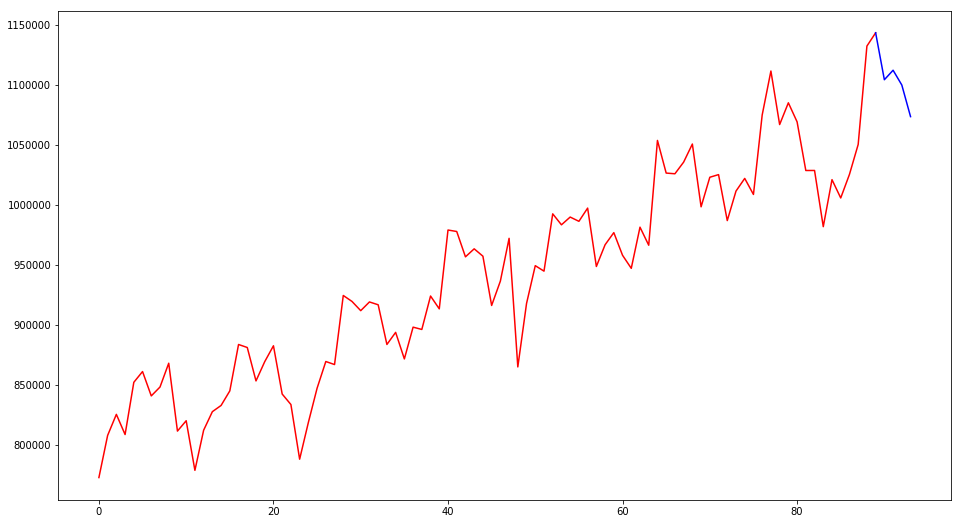

In [74]:
plt.plot(forecast_truevalues_combined.IssuesInMonth.iloc[0:90], 'r', forecast_truevalues_combined.IssuesInMonth.iloc[89:94], 'b')
plt.savefig('forecast_plotted.png')